# Fashion Recognition NN

In [2]:
# Imports
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import halper

import torch.nn.functional as F
import matplotlib.pyplot as plt

from torch import nn
from torch import optim
from torchvision import datasets, transforms

## Get the data

In [3]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

## View random image from the dataset

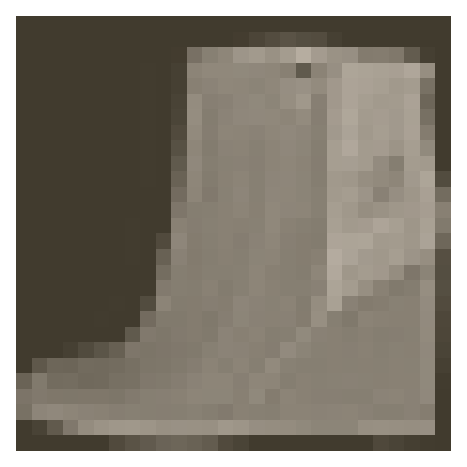

In [4]:
image, label = next(iter(trainloader))
halper.imshow(image[0,:]);

## Define network architecture

In [5]:
#   Each image is 28x28 pixels, 784 in total
#   There are 10 clasees

model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

## Create the network

In [6]:
# Define criterion - NLLLoss or CrossEntropyLoss
criterion = nn.NLLLoss()

# Define optimizer - optim.SGD or optim.Adam
# and Learning Rate
optimizer = optim.Adam(model.parameters(), lr=0.005)

## Train the network

In [7]:
# Adjust hyperparameters (hidden layers, learning rate, etc)
# to get training loss below 0.4

epochs = 30

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()

        output = model(images)
        
        loss = criterion(output, labels)
        loss.backward()
        
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss / len(trainloader)}")

Training loss: 0.539640417961932
Training loss: 0.41443353103422154
Training loss: 0.3739591054538928
Training loss: 0.3576492959820131
Training loss: 0.34639137612381726
Training loss: 0.3327421348915298
Training loss: 0.331087315038069
Training loss: 0.3186222158038794
Training loss: 0.3105016534707185
Training loss: 0.309489080138298
Training loss: 0.29578839543499924
Training loss: 0.29727330394009793
Training loss: 0.2933453228205506
Training loss: 0.3003208241038231
Training loss: 0.2875918575377861
Training loss: 0.274207948081529
Training loss: 0.27823584623682474
Training loss: 0.27598221521816657
Training loss: 0.27384272198290077
Training loss: 0.27392256699566014
Training loss: 0.266870968496558
Training loss: 0.2632353760039946
Training loss: 0.2573405808524918
Training loss: 0.2630100368992733
Training loss: 0.2624620264257068
Training loss: 0.2525955226335889
Training loss: 0.2481898996613618
Training loss: 0.24169358837086635
Training loss: 0.2581033284889101
Training l

## Test the network

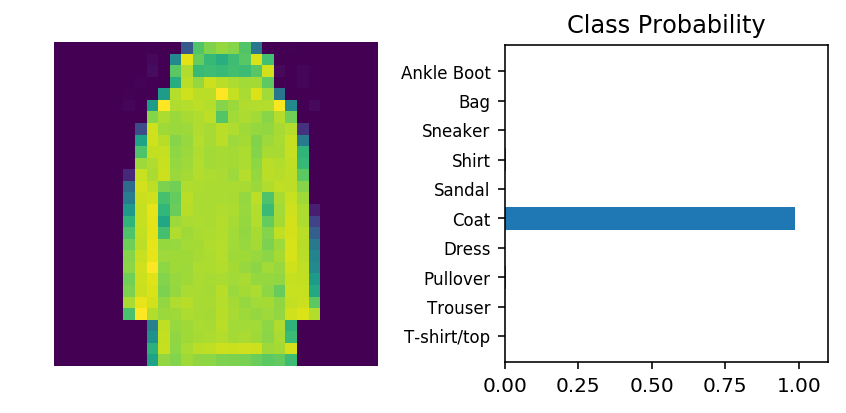

In [10]:
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# Calculate the class probabilities (softmax) for img
logps = model(img)
ps = torch.exp(logps)

# Plot the image and probabilities
halper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

In [ ]:
s